## __Step 1 - Importing Data and Libraries__

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's read the csv file that we have created after reformatting the json file 
# that was obtained through the Alphavantage API

BRKA=pd.read_csv("Berkshire_Stock_Historical.csv",index_col="Date",parse_dates=True)

In [4]:
BRKA

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2023-10-27,BRK.A,509478.500,511180.0000,502000.00,503375.05,7910
2023-10-26,BRK.A,512653.005,514999.9900,508320.94,510125.00,7210
2023-10-25,BRK.A,514931.500,516735.0000,511750.01,512400.00,7082
2023-10-24,BRK.A,514760.000,516974.8700,513072.01,516249.90,6713
2023-10-23,BRK.A,508564.000,515889.9988,507122.01,512499.96,8917
...,...,...,...,...,...,...
1999-11-05,BRK.A,66700.000,66900.0000,65300.00,65300.00,13000
1999-11-04,BRK.A,65800.000,66800.0000,65400.00,65900.00,19000
1999-11-03,BRK.A,65900.000,66600.0000,65500.00,65500.00,36000


In [5]:
# Let's create a copy to keep the original
df=BRKA.copy()

## __Step 2 - EDA and Feature Engineering__

### _Step 2.1 - Data Overview & Column Preparetion_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2023-10-27 to 1999-11-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  6037 non-null   object 
 1   Open    6037 non-null   float64
 2   High    6037 non-null   float64
 3   Low     6037 non-null   float64
 4   Close   6037 non-null   float64
 5   Volume  6037 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 330.1+ KB


In [7]:
df.describe().round(2)

,Open,High,Low,Close,Volume
count,6037.00,6037.00,6037.00,6037.00,6037.00
mean,187729.36,188989.41,186276.52,187659.78,33648.26
std,126498.84,127375.52,125372.03,126333.79,63794.36
min,41700.00,42600.00,40800.00,41300.00,43.00
25%,89200.00,89700.00,88500.00,89195.00,449.00
50%,126515.00,127612.00,125950.00,126800.00,18000.00
75%,269900.00,272220.00,267592.51,270420.00,47700.00
max,563549.00,566569.97,559100.01,563072.76,2740200.00


In [8]:
# Let's drop the symbol column

In [9]:
df.drop("Symbol",axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2023-10-27 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6037 non-null   float64
 1   High    6037 non-null   float64
 2   Low     6037 non-null   float64
 3   Close   6037 non-null   float64
 4   Volume  6037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.0 KB


### _Step 2.2 - Missing & Duplicate Check_

In [11]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# There is no missing value and duplicated row

### _Step 2.3 - asdaşlşfmalmdlşamsdasd_

In [14]:
import seaborn as sns

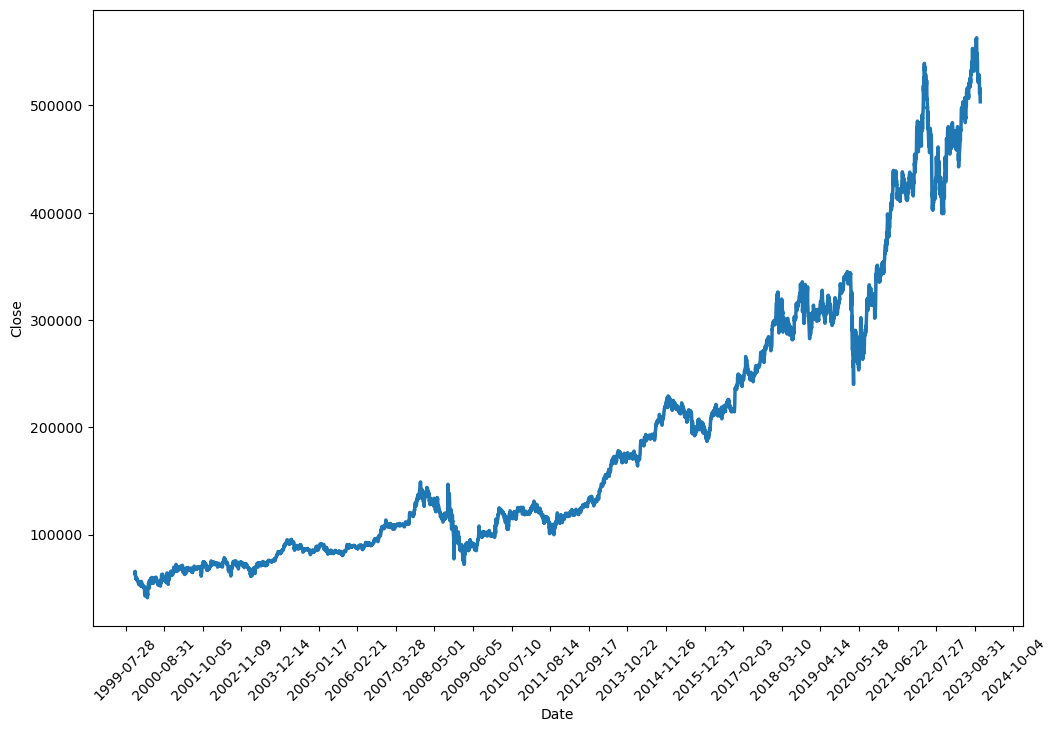

In [15]:
plt.figure(figsize=(12,8))
x_ticks_interval = 400
sns.lineplot(df,x="Date",y="Close", linewidth=2.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(x_ticks_interval))

In [20]:
df.head(1000)

,Date,Open,High,Low,Close,Volume
0,2023-10-27,126.20,130.0200,125.52,127.74,125309313
1,2023-10-26,120.63,121.6393,118.35,119.57,100419516
2,2023-10-25,126.04,126.3400,120.79,121.39,74577544
3,2023-10-24,127.74,128.8000,126.34,128.56,46477355
4,2023-10-23,124.63,127.8800,123.98,126.56,48259953
...,...,...,...,...,...,...
995,2019-11-13,1773.39,1775.0000,1747.32,1753.11,2926892
996,2019-11-12,1774.66,1786.2200,1771.91,1778.00,2038925
997,2019-11-11,1778.00,1780.0000,1767.13,1771.65,1947810
998,2019-11-08,1787.89,1789.8800,1774.04,1785.88,2126198
